In [35]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib
import matplotlib.pyplot as plt
# load data
r_data = pd.read_csv("../result/join_weather_flower/Rose_C0H960_草屯.csv")
r_data = r_data.dropna()
# select year
# gb_df  = r_data.groupby("year")
# r_data = gb_df.get_group(2014.0)
# print(r_data)
r_data = r_data.reset_index()
r_data = r_data.drop(columns="index")
r_data["d_temp"] = r_data['T.Max'] - r_data['T.Min']
d = np.array(r_data["Date"])
day_new=[]
for date in d:
    day_new.append(int(date.split("-")[-1]))
r_data["date_of_m"] = day_new
r_data

,Date,Temperature,T.Max,T.Min,Precp,RH,StnPres,WS,WSGust,avg_price,total_count,year,week,flower,d_temp,date_of_m
0,2014-01-01,17.5,25.0,11.4,0.0,70,1003.0,0.7,3.8,187.723,3813.0,2014.0,1.0,Rose,13.6,1
1,2014-01-02,19.8,27.1,13.5,0.0,65,1001.5,0.9,3.5,188.338,4506.0,2014.0,1.0,Rose,13.6,2
2,2014-01-03,20.7,26.3,16.7,1.5,73,999.7,0.8,4.5,173.910,5283.0,2014.0,1.0,Rose,9.6,3
3,2014-01-04,18.1,22.4,13.9,0.0,69,1000.4,0.5,3.9,162.160,2398.0,2014.0,1.0,Rose,8.5,4
4,2014-01-05,16.1,23.4,11.1,0.0,66,1002.3,0.7,3.6,173.248,2842.0,2014.0,1.0,Rose,12.3,5
5,2014-01-06,16.2,22.5,12.2,0.0,71,1002.8,0.6,4.3,149.852,6076.0,2014.0,1.0,Rose,10.3,6
6,2014-01-07,18.2,25.4,12.7,0.0,72,1002.1,0.8,4.3,167.129,4134.0,2014.0,1.0,Rose,12.7,7
7,2014-01-08,18.9,25.3,14.9,0.0,70,1002.4,1.2,6.4,183.379,3531.0,2014.0,2.0,Rose,10.4,8
8,2014-01-09,15.1,19.4,13.4,0.0,70,1005.9,0.9,8.0,180.495,4488.0,2014.0,2.0,Rose,6.0,9
9,2014-01-10,16.1,22.3,13.1,0.0,72,1007.9,0.8,5.2,165.647,6400.0,2014.0,2.0,Rose,9.2,10


<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:              avg_price   R-squared:                       0.903
Model:                            GLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     3940.
Date:                Sat, 04 May 2019   Prob (F-statistic):               0.00
Time:                        09:57:59   Log-Likelihood:                -8455.8
No. Observations:                1697   AIC:                         1.692e+04
Df Residuals:                    1693   BIC:                         1.694e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0874      0.003     33.389      0.000       0.082       0.092
x2            -0.5760      0.061     -9.464      0.000      -0.695      -0.457
x3            -2.7722      0.184    -15.045      0.000      -3.134      -2.411
x4             1.4253      0.369      3.868      0.000       0.702       2.148
==============================================================================
Omnibus:                      532.368   Durbin-Watson:                   0.226
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2487.136
Skew:                           1.418   Prob(JB):                         0.00
Kurtosis:                       8.209   Cond. No.                         866.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

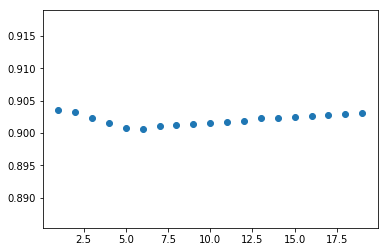

In [38]:




# r_data
# r_data
# remove "/" or not double data
# col_x = ['Temperature', 'd_temp','Precp', 'RH']


col_x = ['Temperature', 'd_temp', 'Precp', 'WS', "year", "week","date_of_m"]
col_x = ["year", "week",'Temperature', 'd_temp']
for col in col_x:
    old = r_data[col]
    new = []
    for i in range(len(old)):
        try:
            new.append(float(old[i]))
            tmp = float(old[i])
        except ValueError:
            new.append(tmp)
    r_data[col] = new
# Normalize data
# col_x = ['Temperature', 'T.Max', 'T.Min', 'Precp', 'RH', 'StnPres', 'WS', 'WSGust']
x_data = r_data[col_x]
# x = (x_data - x_data.mean()) / (x_data.std())
x = x_data
y = r_data["avg_price"]
# y = (y - y.mean() )/(y.std())
# shift
result = []
n = 20
for s_d in range(1,n):
    x_new = np.array(x.drop(index=list(range(s_d )),axis=0))
    y_new = y[:-s_d]
#     print(len(x_new), len(y_new))
#     print(s_d)
    model = sm.regression.linear_model.GLS(y_new, x_new)
    result.append(model.fit().rsquared)
#     print(s_d,"\t", result.rsquared)
print(matplotlib.pyplot.scatter(range(1,n),result))
model.fit().summary()


In [37]:
model_new= sm.regression.linear_model.OLS(y, x)
res = model_new.fit()
print(res.summary2())
y_pre = res.predict(x)
# fig, ax = plt.subplots()
# x_draw = range(len(y_pre))
# ax.plot(x_draw, y_pre, label="Data")
# ax.plot(x_draw, y,label="True")
# ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), 'r', label="OLS prediction")
# ax.legend(loc="best");
cf = pd.DataFrame()
cf["pre"] = y_pre
cf["ans"] = y_new
print(cf.corr())
cf.to_csv("test0504.csv", index=False)
# cf

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.904     
Dependent Variable: avg_price        AIC:                17077.4700
Date:               2019-05-04 09:44 BIC:                17099.2610
No. Observations:   1716             Log-Likelihood:     -8534.7   
Df Model:           4                F-statistic:        4052.     
Df Residuals:       1712             Prob (F-statistic): 0.00      
R-squared:          0.904            Scale:              1226.2    
--------------------------------------------------------------------
                Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
year            0.0891    0.0026   34.6042  0.0000   0.0840   0.0941
week           -0.1214    0.0598   -2.0308  0.0424  -0.2387  -0.0042
Temperature    -3.5679    0.1814  -19.6665  0.0000  -3.9237  -3.2121
d_temp          1.7571    0.3615    4.8600  0.0000   1.0480 

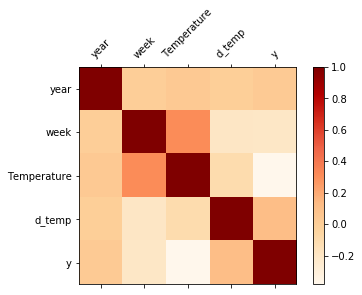

                 year      week  Temperature    d_temp         y
year         1.000000  0.004948     0.034748 -0.002093  0.032656
week         0.004948  1.000000     0.311841 -0.195616 -0.203018
Temperature  0.034748  0.311841     1.000000 -0.105015 -0.382922
d_temp      -0.002093 -0.195616    -0.105015  1.000000  0.113494
y            0.032656 -0.203018    -0.382922  0.113494  1.000000


In [34]:

data = x.copy()
data["y"] = y
# print(data.corr())
c_data = data.corr()
c = data.columns.to_list()


fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(c_data,cmap="OrRd")
fig.colorbar(cax)

ax.set_xticklabels(['']+c)
ax.set_yticklabels(['']+c)
plt.xticks(rotation=45)
plt.show()
print(c_data)

In [6]:
data.describe()

,Temperature,d_temp,Precp,WS,year,week,total_count,y
count,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000
mean,23.822567,11.863403,6.692537,0.866388,2016.037612,26.746269,24731.419701,11.351974
std,4.336032,3.512047,25.963283,0.305835,1.405449,15.032843,14307.991783,2.628169
min,8.600000,1.300000,0.000000,0.300000,2014.000000,1.000000,253.000000,5.976000
25%,21.000000,10.100000,0.000000,0.700000,2015.000000,14.000000,13257.000000,9.580000
50%,24.900000,12.000000,0.000000,0.800000,2016.000000,27.000000,23693.000000,10.933000
75%,27.400000,13.900000,1.000000,1.000000,2017.000000,40.000000,33884.000000,12.800000
max,30.500000,30.100000,386.000000,4.300000,2018.000000,53.000000,74495.000000,28.230000


In [5]:

# x